In [1]:
from keras.models import load_model
import os
import sys
import pandas as pd
from PIL import Image
import numpy as np
sys.path.insert(1, '../src')

import preprocess_image

In [2]:
import importlib
importlib.reload(preprocess_image)

<module 'preprocess_image' from '../src/preprocess_image.py'>

## Load Images from Dataset

In [3]:
data_path = '../data/raw/'
image_dir = os.path.join(data_path, 'fairface_pad125')

val_csv = pd.read_csv(os.path.join(data_path, 'fairface_label_val.csv'))

## Predict

In [7]:
model = load_model("../models/gender_classifier2.hdf5") 

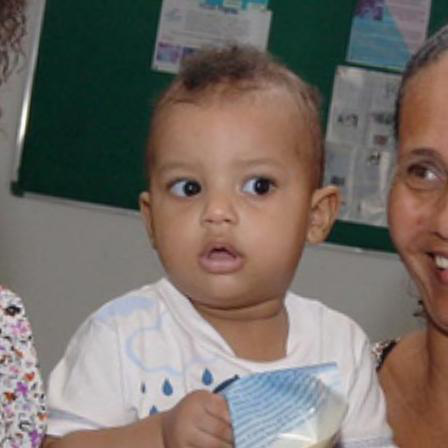

In [40]:
img_path = os.path.join(image_dir, "train/19.jpg")
image = Image.open(img_path)
image

In [41]:
img = preprocess_image.detect_face(img_path)
pred = model.predict(img)[0]

if pred[0] > pred[1]:
    gender = "M"
else:
    gender = "F"

print("Prediction: {}\n\nF: {}\nM: {}".format(gender, pred[1], pred[0]))

Prediction: M

F: 0.13688835501670837
M: 0.862277626991272
